# UBS Challange

In [2]:
import pandas as pd
import numpy as np
import os

path = os.path.join(os.path.join(os.getcwd(), os.pardir),"data")
print(path)

c:\Users\Usee\Documents\Datathon_24\datathon\src\..\data


In [3]:
file = os.path.join(path, "skylab_instagram_datathon_dataset.csv")
data = pd.read_csv(file, delimiter=";")
print(data.describe())

          followers       pictures         videos      comments         likes
count  5.792580e+05  695803.000000  684349.000000  6.953430e+05  6.959770e+05
mean   1.342432e+07     344.272540      61.244426  3.043246e+04  2.163189e+06
std    1.106975e+08    2777.396873     564.468480  2.766459e+05  1.803193e+07
min    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00
25%    3.013372e+05      19.000000       2.000000  3.710000e+02  1.727700e+04
50%    1.104144e+06      44.000000       7.000000  1.435000e+03  9.318400e+04
75%    4.479325e+06     122.000000      20.000000  5.872000e+03  4.577470e+05
max    3.502565e+09  141746.000000   35905.000000  1.732046e+07  7.120711e+08


# Explore Companies

number companies:  54


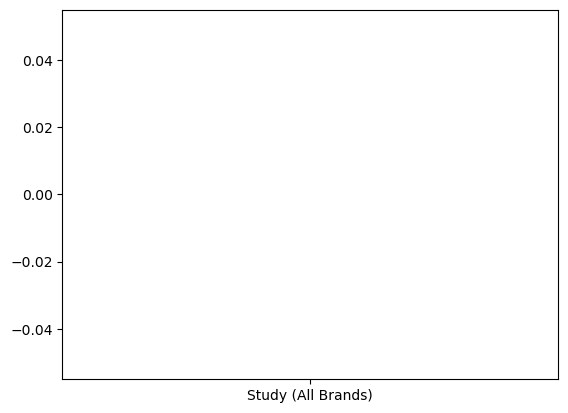

                                     entries   na
Global Luxury Analysts Interest List   29233  NaN
Beauty & Boutique                      44266  NaN
Luxury & Premium & Mainstream          64541  NaN
Apparel Retail                         69341  NaN
US Softlines Analyst Interest List    113744  NaN


In [8]:
import matplotlib.pyplot as plt

def count_entries(data: pd.DataFrame, column: str):
    cats = list(set(list(data["compset"])))
    print("number companies: ", len(cats))

    table = pd.DataFrame(columns=["entries", "na"], index=cats)
    for company in cats:
        data_company = data[data["compset"] == company]
        table.loc[company, "entries"] = len(data_company)
    table = table.sort_values(by=["entries"])
    return table

table = count_entries(data=data, column="compset")
plt.plot(table["na"])
plt.show()
print(table[-5:])

In [17]:
def calculate_yearly_means(df, col, category_column, category_value):
    """
    Calculate yearly means by a specified category.

    Parameters:
        df (DataFrame): The DataFrame containing social media engagement data.
        category_column (str): The name of the column representing the category (e.g., company).
        category_value (str): The specific value of the category for which to calculate yearly means.

    Returns:
        DataFrame: A DataFrame containing the yearly means for the specified category.
    """
    # Filter the DataFrame by the specified category value
    filtered_df = df[df[category_column] == category_value]
    
    # Convert the index to datetime if it's not already
    filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
    # Group by year and calculate means
    yearly_means = filtered_df[col].groupby(filtered_df["year"]).mean()
    
    return yearly_means

# Example usage:
# Assuming df is your DataFrame containing social media engagement data
# Replace 'Company' with the actual column name representing the category (e.g., company)
# Replace 'Company A' with the specific company name for which you want to calculate yearly means
# yearly_means = calculate_yearly_means(df, 'Company', 'Company A')

for col in ["followers", "pictures", "likes", "videos", "comments"]:
    compset_groups = data["compset_group"].unique()
    for cats in compset_groups:
        print(cats)
        print(calculate_yearly_means(df=data, col="followers", category_column="compset", category_value=cats))


Luxury & Premium & Mainstream


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    2.878466e+06
2016    4.617552e+06
2017    6.338252e+06
2018    7.270676e+06
2019    9.044466e+06
2020    1.040397e+07
2021    1.117706e+07
2022    1.225653e+07
2023    1.318907e+07
Name: followers, dtype: float64
Restaurants
year
2015    7.302961e+05
2016    3.211375e+06
2017    3.277776e+06
2018    3.436911e+06
2019    4.277461e+06
2020    5.208781e+06
2021    5.802216e+06
2022    6.294635e+06
2023    6.708612e+06
Name: followers, dtype: float64
Beverages
year
2015    4.039882e+05
2016    1.252322e+06
2017    1.766764e+06
2018    2.283069e+06
2019    2.290989e+06
2020    2.431039e+06
2021    2.606314e+06
2022    2.805122e+06
2023    3.013969e+06
Name: followers, dtype: float64
Apparel Retail


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    3.611240e+06
2016    4.932288e+06
2017    6.099568e+06
2018    5.731867e+06
2019    6.315469e+06
2020    7.340138e+06
2021    8.077032e+06
2022    8.706725e+06
2023    9.102847e+06
Name: followers, dtype: float64
Food Products
year
2015    293713.448276
2016    225237.500000
2017    223716.688755
2018    211236.349345
2019    248110.859135
2020    291968.141953
2021    303449.175904
2022    321492.435535
2023    333176.618243
Name: followers, dtype: float64
Sporting Goods
year
2015    3.958875e+05
2016    8.193155e+05
2017    1.188160e+06
2018    1.274628e+06
2019    1.415066e+06
2020    1.576207e+06
2021    1.668603e+06
2022    1.718070e+06
2023    1.754333e+06
Name: followers, dtype: float64
Sportswear & Athleisure
year
2015    1.759999e+07
2016    2.914201e+07
2017    2.727189e+07
2018    1.795495e+07
2019    1.983325e+07
2020    2.275734e+07
2021    2.465948e+07
2022    2.822175e+07
2023    3.155915e+07
Name: followers, dtype: float64
Beauty & Boutique


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    2.542017e+06
2016    3.808463e+06
2017    5.889424e+06
2018    6.474889e+06
2019    7.731244e+06
2020    8.987272e+06
2021    9.284707e+06
2022    9.594401e+06
2023    9.898321e+06
Name: followers, dtype: float64
Building Products
year
2015              NaN
2016              NaN
2017     55636.691589
2018     59216.482014
2019     67230.031915
2020     79388.754808
2021     94502.980392
2022     98792.373928
2023    109913.852580
Name: followers, dtype: float64
Petcare
year
2015      4974.961538
2016     10069.150943
2017     23337.034014
2018    205338.165094
2019    294178.073077
2020    372327.180769
2021    451326.171629
2022    520152.048027
2023    568178.599509
Name: followers, dtype: float64
Toys & Collectibles
year
2015             NaN
2016             NaN
2017             NaN
2018    1.612601e+06
2019    2.476381e+06
2020    3.380925e+06
2021    3.966194e+06
2022    4.393592e+06
2023    4.126618e+06
Name: followers, dtype: float64
Mattress
year
2015              

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    9.561161e+04
2016    1.523616e+05
2017    2.112124e+05
2018    4.823820e+05
2019    7.225806e+05
2020    9.717833e+05
2021    1.166949e+06
2022    1.284557e+06
2023    1.368992e+06
Name: followers, dtype: float64
Food Retail
year
2015             NaN
2016             NaN
2017             NaN
2018    9.331885e+05
2019    1.557818e+06
2020    2.364913e+06
2021    2.959071e+06
2022    3.342652e+06
2023    3.631216e+06
Name: followers, dtype: float64
Discount Retailers 
year
2015             NaN
2016             NaN
2017             NaN
2018    2.369620e+06
2019    2.701050e+06
2020    3.105375e+06
2021    3.287380e+06
2022    3.538867e+06
2023    3.740708e+06
Name: followers, dtype: float64
Outdoor Gear
year
2015    9.574953e+03
2016    1.103748e+05
2017    3.412017e+05
2018    9.779182e+05
2019    1.257943e+06
2020    1.499718e+06
2021    1.634660e+06
2022    1.706395e+06
2023    1.821619e+06
Name: followers, dtype: float64
Dermatology and Orthodontics


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015              NaN
2016              NaN
2017              NaN
2018    175229.876106
2019    619898.306050
2020    554206.631579
2021    588445.781321
2022    522585.684028
2023    515787.576577
Name: followers, dtype: float64
Entertainment
year
2015             NaN
2016             NaN
2017             NaN
2018    1.560391e+07
2019    3.443062e+07
2020    6.126893e+07
2021    7.027527e+07
2022    8.254528e+07
2023    8.771435e+07
Name: followers, dtype: float64
Home Appliances
year
2015              NaN
2016              NaN
2017              NaN
2018              NaN
2019              NaN
2020              NaN
2021              NaN
2022    551194.554386
2023    652630.364865
Name: followers, dtype: float64
Study (All Brands)
year
2015    3.006632e+08
2016    7.094047e+08
2017    1.139016e+09
2018    1.633835e+09
2019    2.201384e+09
2020    2.630772e+09
2021    2.917592e+09
2022    3.204461e+09
2023    3.423786e+09
Name: followers, dtype: float64
Luxury & Premium & Mainstream

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    2.878466e+06
2016    4.617552e+06
2017    6.338252e+06
2018    7.270676e+06
2019    9.044466e+06
2020    1.040397e+07
2021    1.117706e+07
2022    1.225653e+07
2023    1.318907e+07
Name: followers, dtype: float64
Restaurants
year
2015    7.302961e+05
2016    3.211375e+06
2017    3.277776e+06
2018    3.436911e+06
2019    4.277461e+06
2020    5.208781e+06
2021    5.802216e+06
2022    6.294635e+06
2023    6.708612e+06
Name: followers, dtype: float64
Beverages
year
2015    4.039882e+05
2016    1.252322e+06
2017    1.766764e+06
2018    2.283069e+06
2019    2.290989e+06
2020    2.431039e+06
2021    2.606314e+06
2022    2.805122e+06
2023    3.013969e+06
Name: followers, dtype: float64
Apparel Retail
year
2015    3.611240e+06
2016    4.932288e+06
2017    6.099568e+06
2018    5.731867e+06
2019    6.315469e+06
2020    7.340138e+06
2021    8.077032e+06
2022    8.706725e+06
2023    9.102847e+06
Name: followers, dtype: float64
Food Products


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    293713.448276
2016    225237.500000
2017    223716.688755
2018    211236.349345
2019    248110.859135
2020    291968.141953
2021    303449.175904
2022    321492.435535
2023    333176.618243
Name: followers, dtype: float64
Sporting Goods
year
2015    3.958875e+05
2016    8.193155e+05
2017    1.188160e+06
2018    1.274628e+06
2019    1.415066e+06
2020    1.576207e+06
2021    1.668603e+06
2022    1.718070e+06
2023    1.754333e+06
Name: followers, dtype: float64
Sportswear & Athleisure
year
2015    1.759999e+07
2016    2.914201e+07
2017    2.727189e+07
2018    1.795495e+07
2019    1.983325e+07
2020    2.275734e+07
2021    2.465948e+07
2022    2.822175e+07
2023    3.155915e+07
Name: followers, dtype: float64
Beauty & Boutique
year
2015    2.542017e+06
2016    3.808463e+06
2017    5.889424e+06
2018    6.474889e+06
2019    7.731244e+06
2020    8.987272e+06
2021    9.284707e+06
2022    9.594401e+06
2023    9.898321e+06
Name: followers, dtype: float64
Building Products
year
2015   

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015      4974.961538
2016     10069.150943
2017     23337.034014
2018    205338.165094
2019    294178.073077
2020    372327.180769
2021    451326.171629
2022    520152.048027
2023    568178.599509
Name: followers, dtype: float64
Toys & Collectibles
year
2015             NaN
2016             NaN
2017             NaN
2018    1.612601e+06
2019    2.476381e+06
2020    3.380925e+06
2021    3.966194e+06
2022    4.393592e+06
2023    4.126618e+06
Name: followers, dtype: float64
Mattress
year
2015              NaN
2016     42332.000000
2017     52184.516364
2018     69674.361174
2019     91710.435897
2020    115695.747412
2021    151460.810897
2022    175097.685535
2023    190809.531532
Name: followers, dtype: float64
Fitness & Exercise
year
2015    9.561161e+04
2016    1.523616e+05
2017    2.112124e+05
2018    4.823820e+05
2019    7.225806e+05
2020    9.717833e+05
2021    1.166949e+06
2022    1.284557e+06
2023    1.368992e+06
Name: followers, dtype: float64
Food Retail
year
2015         

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    9.574953e+03
2016    1.103748e+05
2017    3.412017e+05
2018    9.779182e+05
2019    1.257943e+06
2020    1.499718e+06
2021    1.634660e+06
2022    1.706395e+06
2023    1.821619e+06
Name: followers, dtype: float64
Dermatology and Orthodontics
year
2015              NaN
2016              NaN
2017              NaN
2018    175229.876106
2019    619898.306050
2020    554206.631579
2021    588445.781321
2022    522585.684028
2023    515787.576577
Name: followers, dtype: float64
Entertainment
year
2015             NaN
2016             NaN
2017             NaN
2018    1.560391e+07
2019    3.443062e+07
2020    6.126893e+07
2021    7.027527e+07
2022    8.254528e+07
2023    8.771435e+07
Name: followers, dtype: float64
Home Appliances
year
2015              NaN
2016              NaN
2017              NaN
2018              NaN
2019              NaN
2020              NaN
2021              NaN
2022    551194.554386
2023    652630.364865
Name: followers, dtype: float64
Study (All Brands)


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    2.878466e+06
2016    4.617552e+06
2017    6.338252e+06
2018    7.270676e+06
2019    9.044466e+06
2020    1.040397e+07
2021    1.117706e+07
2022    1.225653e+07
2023    1.318907e+07
Name: followers, dtype: float64
Restaurants
year
2015    7.302961e+05
2016    3.211375e+06
2017    3.277776e+06
2018    3.436911e+06
2019    4.277461e+06
2020    5.208781e+06
2021    5.802216e+06
2022    6.294635e+06
2023    6.708612e+06
Name: followers, dtype: float64
Beverages
year
2015    4.039882e+05
2016    1.252322e+06
2017    1.766764e+06
2018    2.283069e+06
2019    2.290989e+06
2020    2.431039e+06
2021    2.606314e+06
2022    2.805122e+06
2023    3.013969e+06
Name: followers, dtype: float64
Apparel Retail
year
2015    3.611240e+06
2016    4.932288e+06
2017    6.099568e+06
2018    5.731867e+06
2019    6.315469e+06
2020    7.340138e+06
2021    8.077032e+06
2022    8.706725e+06
2023    9.102847e+06
Name: followers, dtype: float64
Food Products


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    293713.448276
2016    225237.500000
2017    223716.688755
2018    211236.349345
2019    248110.859135
2020    291968.141953
2021    303449.175904
2022    321492.435535
2023    333176.618243
Name: followers, dtype: float64
Sporting Goods
year
2015    3.958875e+05
2016    8.193155e+05
2017    1.188160e+06
2018    1.274628e+06
2019    1.415066e+06
2020    1.576207e+06
2021    1.668603e+06
2022    1.718070e+06
2023    1.754333e+06
Name: followers, dtype: float64
Sportswear & Athleisure
year
2015    1.759999e+07
2016    2.914201e+07
2017    2.727189e+07
2018    1.795495e+07
2019    1.983325e+07
2020    2.275734e+07
2021    2.465948e+07
2022    2.822175e+07
2023    3.155915e+07
Name: followers, dtype: float64
Beauty & Boutique
year
2015    2.542017e+06
2016    3.808463e+06
2017    5.889424e+06
2018    6.474889e+06
2019    7.731244e+06
2020    8.987272e+06
2021    9.284707e+06
2022    9.594401e+06
2023    9.898321e+06
Name: followers, dtype: float64
Building Products
year
2015   

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015      4974.961538
2016     10069.150943
2017     23337.034014
2018    205338.165094
2019    294178.073077
2020    372327.180769
2021    451326.171629
2022    520152.048027
2023    568178.599509
Name: followers, dtype: float64
Toys & Collectibles
year
2015             NaN
2016             NaN
2017             NaN
2018    1.612601e+06
2019    2.476381e+06
2020    3.380925e+06
2021    3.966194e+06
2022    4.393592e+06
2023    4.126618e+06
Name: followers, dtype: float64
Mattress
year
2015              NaN
2016     42332.000000
2017     52184.516364
2018     69674.361174
2019     91710.435897
2020    115695.747412
2021    151460.810897
2022    175097.685535
2023    190809.531532
Name: followers, dtype: float64
Fitness & Exercise
year
2015    9.561161e+04
2016    1.523616e+05
2017    2.112124e+05
2018    4.823820e+05
2019    7.225806e+05
2020    9.717833e+05
2021    1.166949e+06
2022    1.284557e+06
2023    1.368992e+06
Name: followers, dtype: float64
Food Retail
year
2015         

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    9.574953e+03
2016    1.103748e+05
2017    3.412017e+05
2018    9.779182e+05
2019    1.257943e+06
2020    1.499718e+06
2021    1.634660e+06
2022    1.706395e+06
2023    1.821619e+06
Name: followers, dtype: float64
Dermatology and Orthodontics
year
2015              NaN
2016              NaN
2017              NaN
2018    175229.876106
2019    619898.306050
2020    554206.631579
2021    588445.781321
2022    522585.684028
2023    515787.576577
Name: followers, dtype: float64
Entertainment
year
2015             NaN
2016             NaN
2017             NaN
2018    1.560391e+07
2019    3.443062e+07
2020    6.126893e+07
2021    7.027527e+07
2022    8.254528e+07
2023    8.771435e+07
Name: followers, dtype: float64
Home Appliances
year
2015              NaN
2016              NaN
2017              NaN
2018              NaN
2019              NaN
2020              NaN
2021              NaN
2022    551194.554386
2023    652630.364865
Name: followers, dtype: float64
Study (All Brands)


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    2.878466e+06
2016    4.617552e+06
2017    6.338252e+06
2018    7.270676e+06
2019    9.044466e+06
2020    1.040397e+07
2021    1.117706e+07
2022    1.225653e+07
2023    1.318907e+07
Name: followers, dtype: float64
Restaurants
year
2015    7.302961e+05
2016    3.211375e+06
2017    3.277776e+06
2018    3.436911e+06
2019    4.277461e+06
2020    5.208781e+06
2021    5.802216e+06
2022    6.294635e+06
2023    6.708612e+06
Name: followers, dtype: float64
Beverages
year
2015    4.039882e+05
2016    1.252322e+06
2017    1.766764e+06
2018    2.283069e+06
2019    2.290989e+06
2020    2.431039e+06
2021    2.606314e+06
2022    2.805122e+06
2023    3.013969e+06
Name: followers, dtype: float64
Apparel Retail
year
2015    3.611240e+06
2016    4.932288e+06
2017    6.099568e+06
2018    5.731867e+06
2019    6.315469e+06
2020    7.340138e+06
2021    8.077032e+06
2022    8.706725e+06
2023    9.102847e+06
Name: followers, dtype: float64
Food Products


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    293713.448276
2016    225237.500000
2017    223716.688755
2018    211236.349345
2019    248110.859135
2020    291968.141953
2021    303449.175904
2022    321492.435535
2023    333176.618243
Name: followers, dtype: float64
Sporting Goods
year
2015    3.958875e+05
2016    8.193155e+05
2017    1.188160e+06
2018    1.274628e+06
2019    1.415066e+06
2020    1.576207e+06
2021    1.668603e+06
2022    1.718070e+06
2023    1.754333e+06
Name: followers, dtype: float64
Sportswear & Athleisure
year
2015    1.759999e+07
2016    2.914201e+07
2017    2.727189e+07
2018    1.795495e+07
2019    1.983325e+07
2020    2.275734e+07
2021    2.465948e+07
2022    2.822175e+07
2023    3.155915e+07
Name: followers, dtype: float64
Beauty & Boutique
year
2015    2.542017e+06
2016    3.808463e+06
2017    5.889424e+06
2018    6.474889e+06
2019    7.731244e+06
2020    8.987272e+06
2021    9.284707e+06
2022    9.594401e+06
2023    9.898321e+06
Name: followers, dtype: float64
Building Products
year
2015   

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015      4974.961538
2016     10069.150943
2017     23337.034014
2018    205338.165094
2019    294178.073077
2020    372327.180769
2021    451326.171629
2022    520152.048027
2023    568178.599509
Name: followers, dtype: float64
Toys & Collectibles
year
2015             NaN
2016             NaN
2017             NaN
2018    1.612601e+06
2019    2.476381e+06
2020    3.380925e+06
2021    3.966194e+06
2022    4.393592e+06
2023    4.126618e+06
Name: followers, dtype: float64
Mattress
year
2015              NaN
2016     42332.000000
2017     52184.516364
2018     69674.361174
2019     91710.435897
2020    115695.747412
2021    151460.810897
2022    175097.685535
2023    190809.531532
Name: followers, dtype: float64
Fitness & Exercise
year
2015    9.561161e+04
2016    1.523616e+05
2017    2.112124e+05
2018    4.823820e+05
2019    7.225806e+05
2020    9.717833e+05
2021    1.166949e+06
2022    1.284557e+06
2023    1.368992e+06
Name: followers, dtype: float64
Food Retail
year
2015         

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    9.574953e+03
2016    1.103748e+05
2017    3.412017e+05
2018    9.779182e+05
2019    1.257943e+06
2020    1.499718e+06
2021    1.634660e+06
2022    1.706395e+06
2023    1.821619e+06
Name: followers, dtype: float64
Dermatology and Orthodontics
year
2015              NaN
2016              NaN
2017              NaN
2018    175229.876106
2019    619898.306050
2020    554206.631579
2021    588445.781321
2022    522585.684028
2023    515787.576577
Name: followers, dtype: float64
Entertainment
year
2015             NaN
2016             NaN
2017             NaN
2018    1.560391e+07
2019    3.443062e+07
2020    6.126893e+07
2021    7.027527e+07
2022    8.254528e+07
2023    8.771435e+07
Name: followers, dtype: float64
Home Appliances
year
2015              NaN
2016              NaN
2017              NaN
2018              NaN
2019              NaN
2020              NaN
2021              NaN
2022    551194.554386
2023    652630.364865
Name: followers, dtype: float64
Study (All Brands)


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    2.878466e+06
2016    4.617552e+06
2017    6.338252e+06
2018    7.270676e+06
2019    9.044466e+06
2020    1.040397e+07
2021    1.117706e+07
2022    1.225653e+07
2023    1.318907e+07
Name: followers, dtype: float64
Restaurants
year
2015    7.302961e+05
2016    3.211375e+06
2017    3.277776e+06
2018    3.436911e+06
2019    4.277461e+06
2020    5.208781e+06
2021    5.802216e+06
2022    6.294635e+06
2023    6.708612e+06
Name: followers, dtype: float64
Beverages
year
2015    4.039882e+05
2016    1.252322e+06
2017    1.766764e+06
2018    2.283069e+06
2019    2.290989e+06
2020    2.431039e+06
2021    2.606314e+06
2022    2.805122e+06
2023    3.013969e+06
Name: followers, dtype: float64
Apparel Retail
year
2015    3.611240e+06
2016    4.932288e+06
2017    6.099568e+06
2018    5.731867e+06
2019    6.315469e+06
2020    7.340138e+06
2021    8.077032e+06
2022    8.706725e+06
2023    9.102847e+06
Name: followers, dtype: float64
Food Products


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015    293713.448276
2016    225237.500000
2017    223716.688755
2018    211236.349345
2019    248110.859135
2020    291968.141953
2021    303449.175904
2022    321492.435535
2023    333176.618243
Name: followers, dtype: float64
Sporting Goods
year
2015    3.958875e+05
2016    8.193155e+05
2017    1.188160e+06
2018    1.274628e+06
2019    1.415066e+06
2020    1.576207e+06
2021    1.668603e+06
2022    1.718070e+06
2023    1.754333e+06
Name: followers, dtype: float64
Sportswear & Athleisure
year
2015    1.759999e+07
2016    2.914201e+07
2017    2.727189e+07
2018    1.795495e+07
2019    1.983325e+07
2020    2.275734e+07
2021    2.465948e+07
2022    2.822175e+07
2023    3.155915e+07
Name: followers, dtype: float64
Beauty & Boutique
year
2015    2.542017e+06
2016    3.808463e+06
2017    5.889424e+06
2018    6.474889e+06
2019    7.731244e+06
2020    8.987272e+06
2021    9.284707e+06
2022    9.594401e+06
2023    9.898321e+06
Name: followers, dtype: float64
Building Products
year
2015   

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015      4974.961538
2016     10069.150943
2017     23337.034014
2018    205338.165094
2019    294178.073077
2020    372327.180769
2021    451326.171629
2022    520152.048027
2023    568178.599509
Name: followers, dtype: float64
Toys & Collectibles
year
2015             NaN
2016             NaN
2017             NaN
2018    1.612601e+06
2019    2.476381e+06
2020    3.380925e+06
2021    3.966194e+06
2022    4.393592e+06
2023    4.126618e+06
Name: followers, dtype: float64
Mattress
year
2015              NaN
2016     42332.000000
2017     52184.516364
2018     69674.361174
2019     91710.435897
2020    115695.747412
2021    151460.810897
2022    175097.685535
2023    190809.531532
Name: followers, dtype: float64
Fitness & Exercise
year
2015    9.561161e+04
2016    1.523616e+05
2017    2.112124e+05
2018    4.823820e+05
2019    7.225806e+05
2020    9.717833e+05
2021    1.166949e+06
2022    1.284557e+06
2023    1.368992e+06
Name: followers, dtype: float64
Food Retail


C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

year
2015             NaN
2016             NaN
2017             NaN
2018    9.331885e+05
2019    1.557818e+06
2020    2.364913e+06
2021    2.959071e+06
2022    3.342652e+06
2023    3.631216e+06
Name: followers, dtype: float64
Discount Retailers 
year
2015             NaN
2016             NaN
2017             NaN
2018    2.369620e+06
2019    2.701050e+06
2020    3.105375e+06
2021    3.287380e+06
2022    3.538867e+06
2023    3.740708e+06
Name: followers, dtype: float64
Outdoor Gear
year
2015    9.574953e+03
2016    1.103748e+05
2017    3.412017e+05
2018    9.779182e+05
2019    1.257943e+06
2020    1.499718e+06
2021    1.634660e+06
2022    1.706395e+06
2023    1.821619e+06
Name: followers, dtype: float64
Dermatology and Orthodontics
year
2015              NaN
2016              NaN
2017              NaN
2018    175229.876106
2019    619898.306050
2020    554206.631579
2021    588445.781321
2022    522585.684028
2023    515787.576577
Name: followers, dtype: float64
Entertainment
year
2015  

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1054518351.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
